# Imports and Preprocessing

In [53]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import ipyplot
from PIL import Image
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalization
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encoding of labels to learn how to handle one-hot encoded labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 792s 5us/step


# EDA

In [4]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)



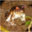
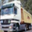
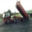
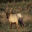
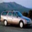
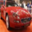
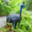
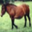
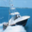
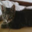
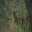
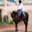
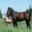
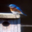
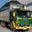
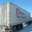
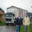
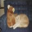
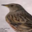
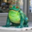


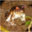
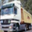
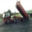
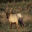
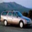
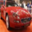
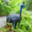
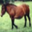
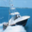
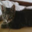
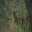
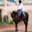
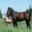
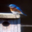
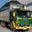
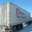
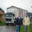
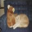
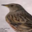
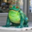

In [41]:
def display_images(images, labels, with_tabs=False):
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    labels = [class_names[tf.argmax(label).numpy()] for label in labels]
    
    if with_tabs:
        ipyplot.plot_class_tabs(images, labels, max_imgs_per_tab=10, img_width=150)
    else:
        ipyplot.plot_images(images, labels, max_images=20)

diplay_images(x_train[:20], y_train[:20])

In [65]:
def save_images(images, labels, save_dir="../../datasets/images/cifar"):
    """
    util function to save images
    """
    os.makedirs(save_dir, exist_ok=True)
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    label_names = [class_names[tf.argmax(label).numpy()] for label in labels]

    for i, image in enumerate(images):
        # Convert NumPy array to PIL Image
        pil_image = Image.fromarray(np.clip(image * 255, 0, 255).astype(np.uint8))
        
        # Generate a filename based on class name and index
        filename = f"{label_names[i]}_{i + 1}.png"
        
        # Save the image in the specified folder
        pil_image.save(os.path.join(save_dir, filename))
    
    print(f"Images saved in the folder: {save_dir}")

save_images(x_train[:10000], y_train[:10000])

Images saved in the folder: ../../datasets/images/cifar


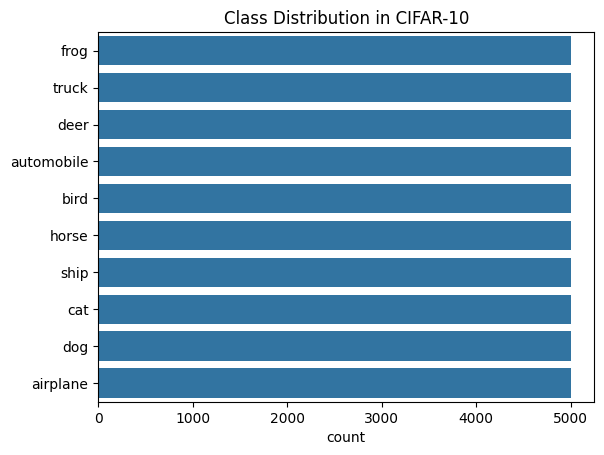

In [66]:
labels = [class_names[tf.argmax(label).numpy()] for label in y_train]
sns.countplot(labels)
plt.title('Class Distribution in CIFAR-10')
plt.show()

# Training and Evaluation

In [57]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
hist = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 35ms/step - accuracy: 0.3279 - loss: 1.8357 - val_accuracy: 0.4964 - val_loss: 1.4133
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - accuracy: 0.5397 - loss: 1.2843 - val_accuracy: 0.5782 - val_loss: 1.1624
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 29ms/step - accuracy: 0.6079 - loss: 1.1029 - val_accuracy: 0.6279 - val_loss: 1.0562
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.6508 - loss: 0.9937 - val_accuracy: 0.6555 - val_loss: 0.9932
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.6805 - loss: 0.9138 - val_accuracy: 0.6759 - val_loss: 0.9459
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.7050 - loss: 0.8458 - val_accuracy: 0.6753 - val_loss: 0.9460
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.7235 - loss: 0.7920 - val_accuracy: 0.6716 - val_loss: 0.9525
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7387 - loss: 0.7491 - 

In [59]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - 3ms/step - accuracy: 0.7019 - loss: 0.9267
Test accuracy: 0.7019000053405762


In [62]:
model_dir="../../models"
os.makedirs(model_dir, exist_ok=True)
model.save(f"{model_dir}/cifar_cnn_model.keras")

# Gradio UI

In [69]:
import gradio as gr
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('../../models/cifar_cnn_model.keras')

# Class names corresponding to CIFAR-10 labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Preprocess the uploaded image
def preprocess_image(img):
    img = img.resize((32, 32)) # (32,32,1)
    img = np.array(img)
    
    # Normalize the image to the range [0, 1]
    img = img.astype('float32') / 255.0
    
    # Expand dimensions to add batch size (1 image)
    img = np.expand_dims(img, axis=0) # (1,32,32,1)
    
    return img

# Prediction function
def predict_image(img):
    if img is None:
        return None
    img = preprocess_image(img)
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions, axis=1)
    return class_names[predicted_class[0]]

demo = gr.Interface(fn=predict_image, 
                    inputs=gr.Image(type="pil", label="Upload an image"), 
                    outputs=gr.Label(num_top_classes=1, label="Predicted Class"),
                    title = "CIFAR Classification",
                    description = "Classifier between the following classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship and truck",
                    live=True)

demo.launch()

* Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
